In [352]:
# Group 15

- Arvind Kumar Deenadayalan Raju
- Blessy Gabriel
- Nihkin Jacob
- John Oloyede

# Big Data Coursework - Road Safety Data (Birmingham)
This is a Data Preprocessing and Exploratory Data Analysis (EDA) report for Road Safety Data in Birmingham.

# Introduction
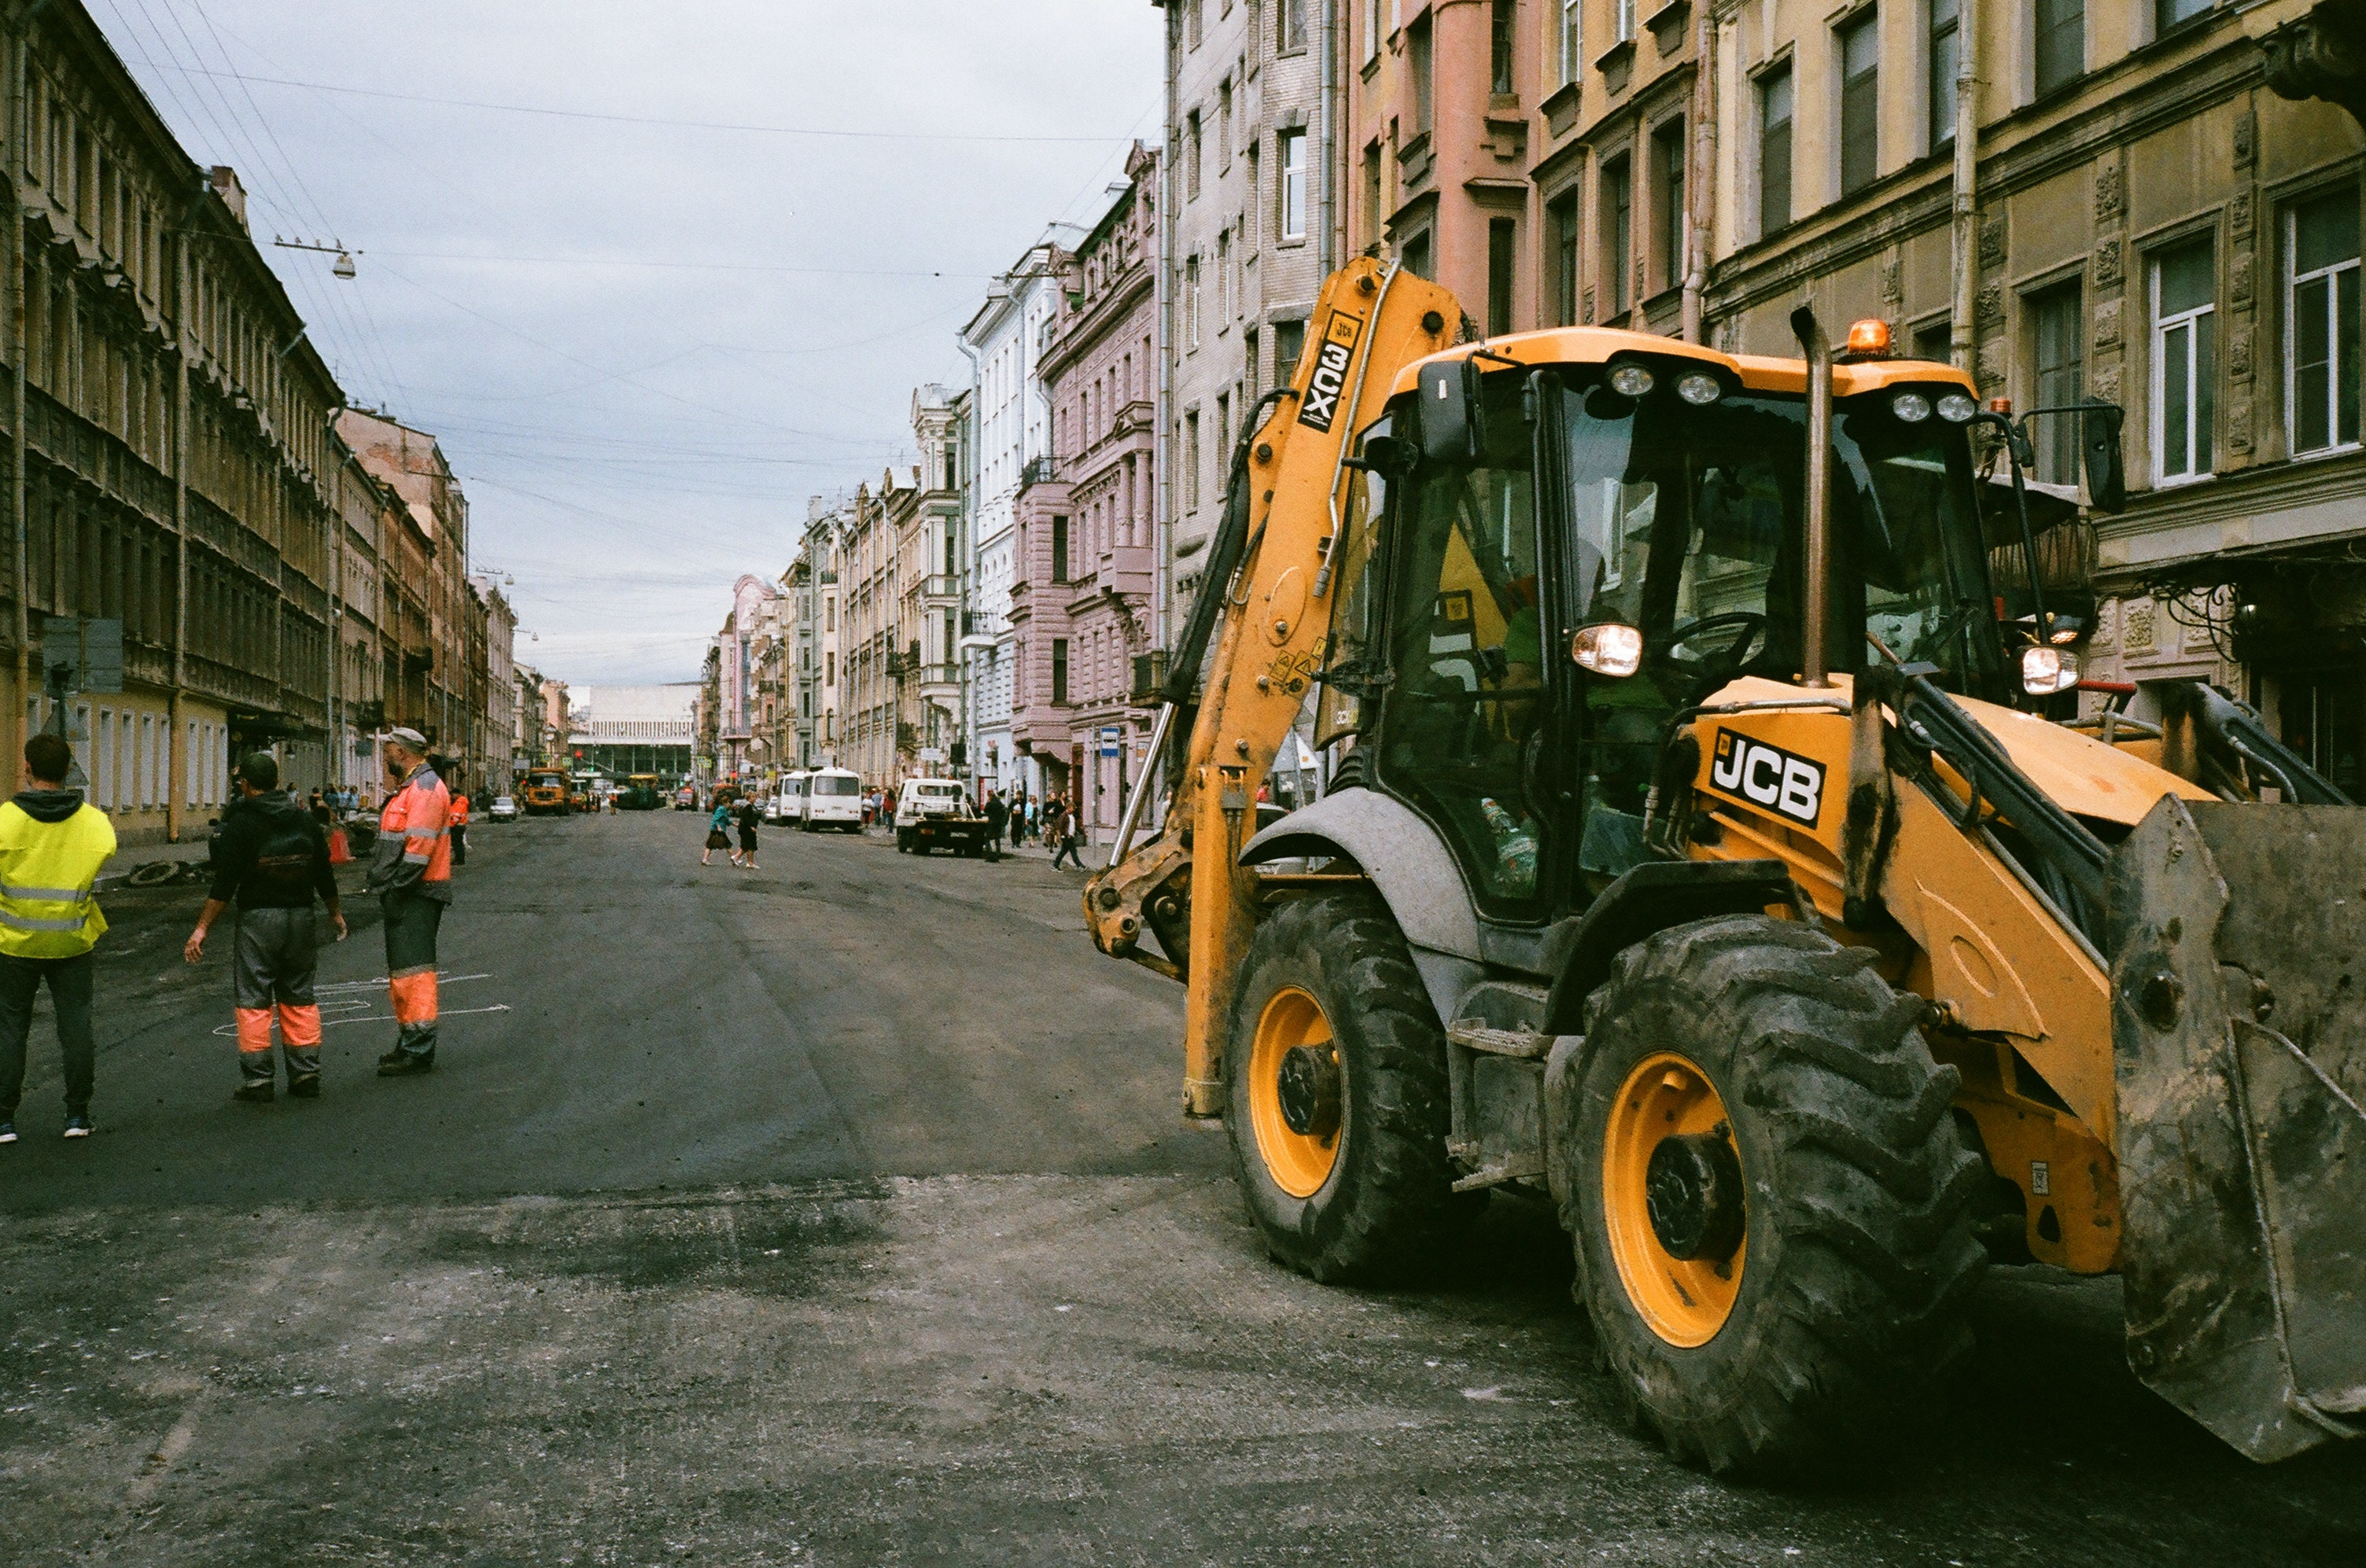
## Business Problem 
The Birmingham City Council is interested in predicting the number of road accidents that are likely to occur in their area. The purpose of this prediction is to allocate resources for road maintenance and improvement projects in a more informed and efficient way. By forecasting the number of accidents, the government can gain insights into which roads are the most dangerous or hazardous and need to be improved. This can help them to prioritize their resources and focus their efforts on areas that are likely to have the greatest impact on road safety.

Overall, the goal of this project is to use predictive analytics in Birmingham as the dependent variable to help the Birmingham City Council to better understand and manage road safety in their area. By using data to inform their decision-making, they can make more informed choices about how to allocate their resources and take steps to improve the safety of their roads.

**Prediction**
- Number of Accidents per Month

**Data Source**

The dataset required from this analysis is acquired from the link below:
https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data


## 1) Import Libraries, Packages and Required Dataset

In [353]:
#Importing all the necessary packages for the EDA project
# Base Libraries
import pandas as pd

pd.set_option('display.max_colwidth', None)
from pandas import DataFrame

# Libraries for Plotting

#packages for Data preprocessing and Cleaning
from sklearn.preprocessing import LabelEncoder

### 1.1) Loading Dataset - Road Safety Data (Accident Data From 1979 - 2021)
The dataset contains all road accidents that have occurred in the United Kingdom between 1979 - 2021

In [354]:
#Load Initial Dataset
# This data set contains both the dependent and the independent analysis which be required to complete the analysis
# df_accident = pd.read_csv('dft-road-casualty-statistics-accident-1979-2021.csv', low_memory=False)
df_accident = pd.read_csv('dft-road-casualty-statistics-accident-last-5-years.csv', low_memory=False)

In [355]:
#Display First 5 Rows to validate the accident dataframe
df_accident.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,0,4,1,1,0,0,1,1,2,E01001450
1,2017010009342,2017,010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,...,0,4,1,2,0,0,1,1,2,E01004702
2,2017010009344,2017,010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,...,0,4,1,1,0,0,1,1,2,E01004298
3,2017010009348,2017,010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,...,4,4,2,2,0,0,1,1,2,E01001429
4,2017010009350,2017,010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,...,5,4,1,2,0,0,1,1,2,E01001808


In [356]:
# Validating the number or rows and columns 
df_accident.shape

(562439, 36)

There are 8.7 million accidents and 36 variables which explain the situation around that accident. This dataset will later be filtered out to what we need to focus on Birmingham.

In [357]:
#Provide a summary of the dataframe
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562439 entries, 0 to 562438
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               562439 non-null  object 
 1   accident_year                                562439 non-null  int64  
 2   accident_reference                           562439 non-null  object 
 3   location_easting_osgr                        562306 non-null  float64
 4   location_northing_osgr                       562306 non-null  float64
 5   longitude                                    562296 non-null  float64
 6   latitude                                     562296 non-null  float64
 7   police_force                                 562439 non-null  int64  
 8   accident_severity                            562439 non-null  int64  
 9   number_of_vehicles                           562439 non-nul

Variables are categorised into multiple types : Nominal, Ordinal, Interval, Ratio.
To simplify, the types are narrowed down into 3 main types:
- Numeric : Variables containing numeric values.
- Categorical : Variables containing text data / each unique value indicates a category.
- Boolean : Categorical Variables with two categories

## 1.2)Selection of Relevant Section of Data
We would be focusing on Birmingham's accident data, and also the accidents which happened within the last 10 years. The Road Safety Dataset Guide helps us identify all data which regards with Birmingham are categorised under the local authority district as **300**

In [358]:
# Limiting Data to Birmingham Only
df_accident = df_accident[(df_accident.local_authority_district == 300)]
df_accident.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
55371,2017200141443,2017,200141443,412319.0,295720.0,-1.819712,52.559195,20,3,1,...,1,4,8,2,0,0,1,2,2,E01009451
55372,2017200142150,2017,200142150,403593.0,284702.0,-1.948542,52.460269,20,3,3,...,0,1,8,4,0,0,1,2,2,E01009068
55376,2017200143906,2017,200143906,405762.0,286453.0,-1.916591,52.475992,20,2,1,...,0,4,9,1,0,0,1,1,2,E01033639
55377,2017200144448,2017,200144448,411986.0,286522.0,-1.824954,52.476512,20,2,1,...,0,1,1,1,0,0,1,1,2,E01009341
55380,2017200147014,2017,200147014,407379.0,281580.0,-1.892889,52.432165,20,2,1,...,0,4,2,2,0,0,1,1,2,E01009175


In [359]:
# Limiting Data to Last 10 Years (2011-2021)
df_accident = df_accident[df_accident.accident_year.between(2011, 2021)]
df_accident.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
55371,2017200141443,2017,200141443,412319.0,295720.0,-1.819712,52.559195,20,3,1,...,1,4,8,2,0,0,1,2,2,E01009451
55372,2017200142150,2017,200142150,403593.0,284702.0,-1.948542,52.460269,20,3,3,...,0,1,8,4,0,0,1,2,2,E01009068
55376,2017200143906,2017,200143906,405762.0,286453.0,-1.916591,52.475992,20,2,1,...,0,4,9,1,0,0,1,1,2,E01033639
55377,2017200144448,2017,200144448,411986.0,286522.0,-1.824954,52.476512,20,2,1,...,0,1,1,1,0,0,1,1,2,E01009341
55380,2017200147014,2017,200147014,407379.0,281580.0,-1.892889,52.432165,20,2,1,...,0,4,2,2,0,0,1,1,2,E01009175


In [360]:
# Validating the number or rows and columns 
df_accident.shape

(9762, 36)

The number of rows drop from 8.7 billion to 25,316

## 2) Data preprocessing (data cleaning, normalization, scaling, handling missing values, Feature Engineering.)

**The first done is to identify the columns which would not be useful to help implement the solution to the business problem. The columns which where identified to be useful and would also act as our independent variables are:**
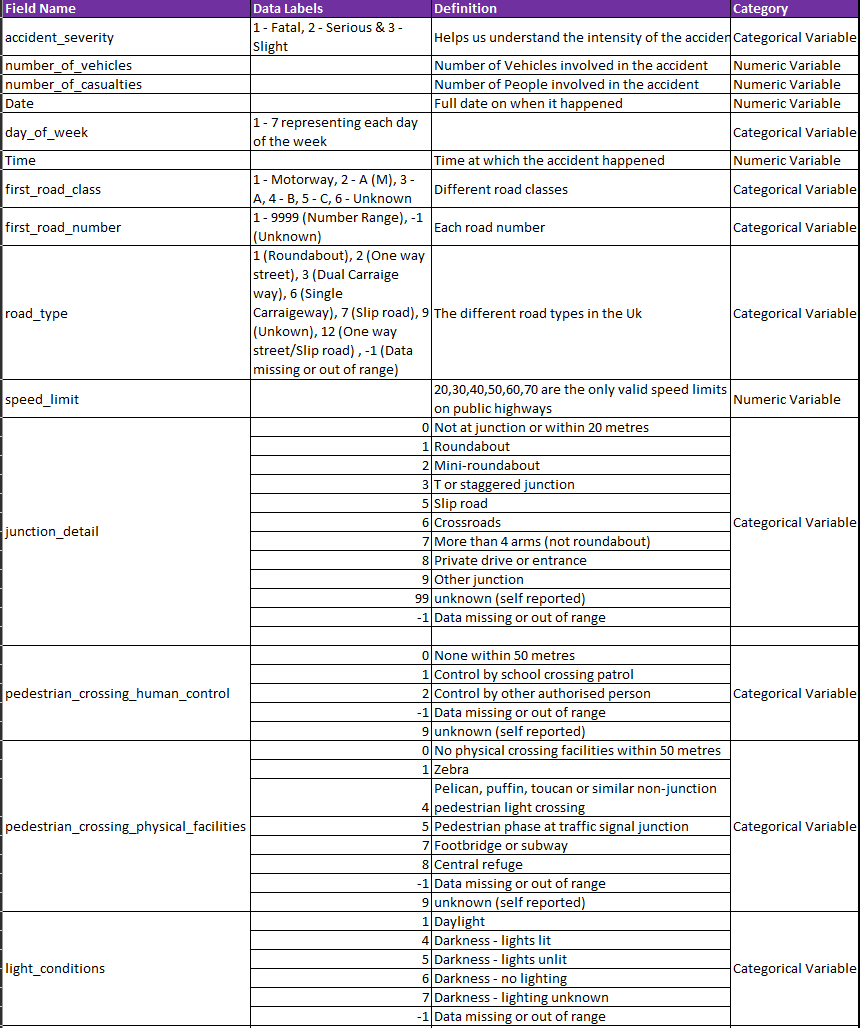
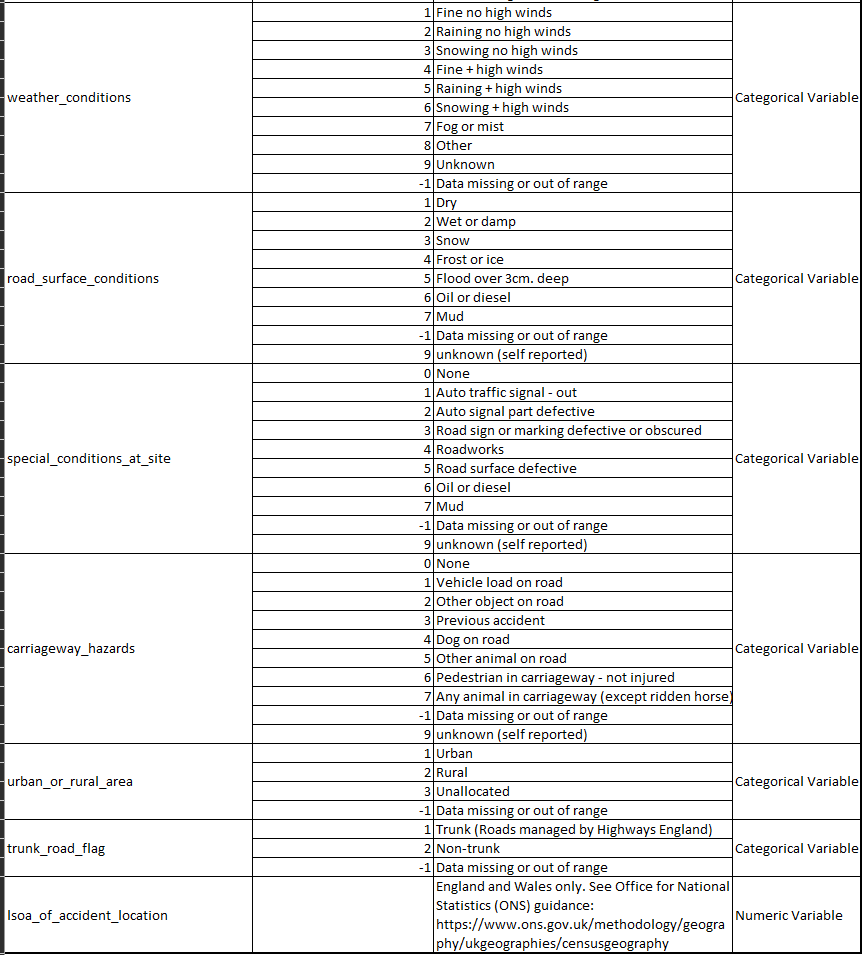

In [361]:
# Deleting Unused Columns
df_accident.drop(["accident_index", "accident_reference", "accident_year", "police_force",
                  "did_police_officer_attend_scene_of_accident", "location_easting_osgr", "location_northing_osgr",
                  "local_authority_district", "local_authority_highway", "local_authority_ons_district", "longitude",
                  "junction_control", "second_road_class", "second_road_number",
                  "latitude"], axis=1, inplace=True)
df_accident.head()

,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,lsoa_of_accident_location
55371,3,1,1,01/01/2017,1,16:46,6,0,6,30,...,0,1,4,8,2,0,0,1,2,E01009451
55372,3,3,2,02/01/2017,2,09:30,6,0,6,30,...,0,0,1,8,4,0,0,1,2,E01009068
55376,2,1,1,01/01/2017,1,03:17,6,0,2,30,...,0,0,4,9,1,0,0,1,2,E01033639
55377,2,1,1,05/01/2017,5,08:33,6,0,6,30,...,0,0,1,1,1,0,0,1,2,E01009341
55380,2,1,1,16/01/2017,2,17:20,6,0,6,30,...,0,0,4,2,2,0,0,1,2,E01009175


In [362]:
# Validating the number or rows and columns 
df_accident.shape

(9762, 21)

In [363]:
# Find Missing Values
df_accident = df_accident.replace(-1, None)
df_accident.isna().sum()

accident_severity                           0
number_of_vehicles                          0
number_of_casualties                        0
date                                        0
day_of_week                                 0
time                                        0
first_road_class                            0
first_road_number                           0
road_type                                   0
speed_limit                                 0
junction_detail                             0
pedestrian_crossing_human_control          29
pedestrian_crossing_physical_facilities    27
light_conditions                            0
weather_conditions                          0
road_surface_conditions                    40
special_conditions_at_site                 10
carriageway_hazards                        10
urban_or_rural_area                         0
trunk_road_flag                             0
lsoa_of_accident_location                   0
dtype: int64

In [364]:
# Delete Rows with Missing Values
df_accident.dropna(inplace=True)

In [365]:
# remove the duplicates
df_accident.drop_duplicates(inplace=True)

**We need to extract the Months from the date column because the data does not provide the accidents per month**

In [366]:
# Extracting Month From Date Column
df_accident[["day", "month", "year"]] = df_accident["date"].apply(lambda x: pd.Series(str(x).split("/")))
df_accident.drop(["day", "date"], axis=1, inplace=True)
df_accident.head()

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,junction_detail,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,lsoa_of_accident_location,month,year
55371,3,1,1,1,16:46,6,0,6,30,0,...,4,8,2,0,0,1,2,E01009451,01,2017
55372,3,3,2,2,09:30,6,0,6,30,0,...,1,8,4,0,0,1,2,E01009068,01,2017
55376,2,1,1,1,03:17,6,0,2,30,3,...,4,9,1,0,0,1,2,E01033639,01,2017
55377,2,1,1,5,08:33,6,0,6,30,0,...,1,1,1,0,0,1,2,E01009341,01,2017
55380,2,1,1,2,17:20,6,0,6,30,3,...,4,2,2,0,0,1,2,E01009175,01,2017




**The hour which the accident occurred is also useful to help identify high risk times and would be a very important predictor variable for the model**

The data set only provides the full time at which the accident occurred, the code below extracts the hour from the time column and creates a new column called hour and places each hour each accident occurred in that column.



In [367]:
# Extracting Hour From Time Column
df_accident[["hour", "minute"]] = df_accident["time"].apply(lambda x: pd.Series(str(x).split(":")))
df_accident.drop(["time", "minute"], axis=1, inplace=True)
df_accident.head()

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,...,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,lsoa_of_accident_location,month,year,hour
55371,3,1,1,1,6,0,6,30,0,0,...,8,2,0,0,1,2,E01009451,01,2017,16
55372,3,3,2,2,6,0,6,30,0,0,...,8,4,0,0,1,2,E01009068,01,2017,09
55376,2,1,1,1,6,0,2,30,3,0,...,9,1,0,0,1,2,E01033639,01,2017,03
55377,2,1,1,5,6,0,6,30,0,0,...,1,1,0,0,1,2,E01009341,01,2017,08
55380,2,1,1,2,6,0,6,30,3,0,...,2,2,0,0,1,2,E01009175,01,2017,17


We created dummy variables to help calculate the number of accidents for each day of the week that month.

In [368]:
# Dummy Variable Encoding
# create 7 columns using pandas get_dummies function
day_cols = pd.get_dummies(df_accident["day_of_week"], prefix="day")

# merge the one-hot encoded dataframe with the original dataframe
df_accident = pd.concat([df_accident, day_cols], axis=1)

# drop the original 'Day_of_Week' column
df_accident.drop("day_of_week", axis=1, inplace=True)
df_accident.head()

,accident_severity,number_of_vehicles,number_of_casualties,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,...,month,year,hour,day_1,day_2,day_3,day_4,day_5,day_6,day_7
55371,3,1,1,6,0,6,30,0,0,1,...,01,2017,16,1,0,0,0,0,0,0
55372,3,3,2,6,0,6,30,0,0,0,...,01,2017,09,0,1,0,0,0,0,0
55376,2,1,1,6,0,2,30,3,0,0,...,01,2017,03,1,0,0,0,0,0,0
55377,2,1,1,6,0,6,30,0,0,0,...,01,2017,08,0,0,0,0,1,0,0
55380,2,1,1,6,0,6,30,3,0,0,...,01,2017,17,0,1,0,0,0,0,0


In [369]:
# Grouping Data By Location (LSOA) & Month
group_df = df_accident.groupby(["lsoa_of_accident_location", "month"])
print("Total Groups - ", len(group_df))

Total Groups -  4588


In [370]:
# Display First Group
df_first = pd.DataFrame
for group, data in group_df:
    print("First Group (Location, Month) - ", group)
    df_first = data
    break
df_first.head()

First Group (Location, Month) -  ('E01008881', '01')


,accident_severity,number_of_vehicles,number_of_casualties,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,...,month,year,hour,day_1,day_2,day_3,day_4,day_5,day_6,day_7
182827,3,2,2,6,0,6,30,0,0,1,...,01,2018,16,0,0,1,0,0,0,0
302732,2,1,1,6,0,6,30,0,0,4,...,01,2019,08,0,1,0,0,0,0,0
410190,2,2,1,3,4040,6,30,3,0,4,...,01,2020,18,0,0,0,0,0,0,1
410426,3,2,2,3,4040,1,30,1,0,4,...,01,2020,17,0,1,0,0,0,0,0
410621,2,1,1,6,0,6,30,0,0,4,...,01,2020,08,0,0,1,0,0,0,0


In [371]:
# Calculating the Sums of Vehicles & Casualties Columns
cols = ["number_of_vehicles", "number_of_casualties", "day_1", "day_2", "day_3", "day_4", "day_5", "day_6", "day_7"]
count = 0
for group, data in group_df:
    # Displaying First 2 Sums
    if count < 2:
        print("Group", (count + 1), "- ", group)
        print(data[cols].sum(), "\n")
        count += 1

Group 1 -  ('E01008881', '01')
number_of_vehicles      8
number_of_casualties    7
day_1                   0
day_2                   2
day_3                   2
day_4                   0
day_5                   0
day_6                   0
day_7                   1
dtype: int64 

Group 2 -  ('E01008881', '02')
number_of_vehicles      5
number_of_casualties    3
day_1                   1
day_2                   1
day_3                   1
day_4                   0
day_5                   0
day_6                   0
day_7                   0
dtype: int64 



In [372]:
# Calculating the Mode (Most Occurrence) Of Each Column
count = 0

# Displaying for First Group
df_mode = pd.DataFrame
for group, data in group_df:
    if count < 1:
        print("First Group - ", group)
        df_mode = data.mode(numeric_only=False, dropna=True).dropna()
        count += 1
df_mode.head()

First Group -  ('E01008881', '01')


,accident_severity,number_of_vehicles,number_of_casualties,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,...,month,year,hour,day_1,day_2,day_3,day_4,day_5,day_6,day_7
0,2,2,1,6,0,6,30,0,0,4,...,01,2020,08,0,0,0,0,0,0,0


In [373]:
# Creating the final Dataset with required columns
df_final = pd.DataFrame(columns=["no_of_accidents"] + df_mode.columns.tolist())
df_final.head()

,no_of_accidents,accident_severity,number_of_vehicles,number_of_casualties,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,...,month,year,hour,day_1,day_2,day_3,day_4,day_5,day_6,day_7


In [374]:
# Combining ModeDF & SumDF to Create Final Dataset
count = 0
for group, data in group_df:
    # Calculate Modes in Group
    df_mode = data.mode(numeric_only=False, dropna=True).dropna()

    # Calculate Sums (Vehicles & Casualties) in Group
    df_sum = DataFrame(data[cols].sum()).transpose()

    # Replace Vehicles Column (SumDF -> ModeDF)
    df_mode.number_of_vehicles = df_sum.number_of_vehicles

    # Replace Casualties Column (SumDF -> ModeDF)
    df_mode.number_of_casualties = df_sum.number_of_casualties

    # Replace Day1 - Day7 Columns (SumDF -> ModeDF)
    for day in day_cols:
        df_mode[day] = df_sum[day]

    # Append Updated ModeDF to FinalDF
    df_final = pd.concat([df_final, df_mode.iloc[:1]])
    df_final = df_final.reset_index(drop=True)

# Get Total Number of Accidents Per Month
df_final.no_of_accidents = df_final.day_1 + df_final.day_2 + df_final.day_3 + df_final.day_4 + df_final.day_5 + df_final.day_6 + df_final.day_7
df_final.shape

(4588, 29)

In [375]:
# Dataset Sample
df_final.head()

,no_of_accidents,accident_severity,number_of_vehicles,number_of_casualties,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,...,month,year,hour,day_1,day_2,day_3,day_4,day_5,day_6,day_7
0,5,2,8,7,6,0,6,30,0,0,...,01,2020,08,0,2,2,0,0,0,1
1,3,3.0,5,3,3.0,4040.0,6.0,30.0,0.0,0,...,02,2019,08,1,1,1,0,0,0,0
2,2,3.0,4,3,6.0,0.0,6.0,30.0,0,0,...,03,2018,08,1,0,1,0,0,0,0
3,3,3.0,6,3,3.0,4040.0,6.0,30.0,1.0,0,...,04,2017,07,0,0,0,0,1,1,1
4,2,2,4,2,6.0,0.0,6.0,20,3.0,0,...,05,2018,06,0,1,0,0,1,0,0


In [376]:
# Label Encoding

# Creating an Instance of Label Encoder.
le = LabelEncoder()

# Using .fit_transform to Fit Labels for Month & Location
label_month = le.fit_transform(df_final.month)
label_location = le.fit_transform(df_final.lsoa_of_accident_location)


In [377]:
# Printing Month Label
label_month

array([ 0,  1,  2, ...,  9, 10, 11])

In [378]:
# Printing Location Label
label_location

array([  0,   0,   0, ..., 645, 645, 645])

In [379]:
# Replacing Location & Month Columns with the Encoded Versions
df_final.drop(["lsoa_of_accident_location", "month"], axis=1, inplace=True)

In [380]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4588 entries, 0 to 4587
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   no_of_accidents                          4588 non-null   object
 1   accident_severity                        4588 non-null   object
 2   number_of_vehicles                       4588 non-null   object
 3   number_of_casualties                     4588 non-null   object
 4   first_road_class                         4588 non-null   object
 5   first_road_number                        4588 non-null   object
 6   road_type                                4588 non-null   object
 7   speed_limit                              4588 non-null   object
 8   junction_detail                          4588 non-null   object
 9   pedestrian_crossing_human_control        4588 non-null   object
 10  pedestrian_crossing_physical_facilities  4588 non-null   obj

In [381]:
df_final["location"] = label_location
df_final["month"] = label_month

In [382]:
# Final Dataset Sample
df_final.head(n=10)

,no_of_accidents,accident_severity,number_of_vehicles,number_of_casualties,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,...,hour,day_1,day_2,day_3,day_4,day_5,day_6,day_7,location,month
0,5,2,8,7,6,0,6,30,0,0,...,08,0,2,2,0,0,0,1,0,0
1,3,3.0,5,3,3.0,4040.0,6.0,30.0,0.0,0,...,08,1,1,1,0,0,0,0,0,1
2,2,3.0,4,3,6.0,0.0,6.0,30.0,0,0,...,08,1,0,1,0,0,0,0,0,2
3,3,3.0,6,3,3.0,4040.0,6.0,30.0,1.0,0,...,07,0,0,0,0,1,1,1,0,3
4,2,2,4,2,6.0,0.0,6.0,20,3.0,0,...,06,0,1,0,0,1,0,0,0,4
5,5,3.0,9,10,3.0,4040.0,6.0,30.0,0.0,0,...,12,0,1,2,0,0,1,1,0,5
6,3,3.0,4,3,3.0,4040.0,6.0,30.0,0,0,...,01,1,0,0,0,1,0,1,0,6
7,2,2,3,2,3,0,6.0,30.0,0,0,...,10,0,0,1,1,0,0,0,0,7
8,1,2,1,1,3,4040,6,30,0,0,...,20,0,0,0,0,0,0,1,0,8
9,1,3,1,1,6,0,6,30,0,0,...,14,0,0,0,0,0,0,1,0,9


In [383]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4588 entries, 0 to 4587
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   no_of_accidents                          4588 non-null   object
 1   accident_severity                        4588 non-null   object
 2   number_of_vehicles                       4588 non-null   object
 3   number_of_casualties                     4588 non-null   object
 4   first_road_class                         4588 non-null   object
 5   first_road_number                        4588 non-null   object
 6   road_type                                4588 non-null   object
 7   speed_limit                              4588 non-null   object
 8   junction_detail                          4588 non-null   object
 9   pedestrian_crossing_human_control        4588 non-null   object
 10  pedestrian_crossing_physical_facilities  4588 non-null   obj

In [384]:
df_final = df_final.astype(float)
df_final.describe()

,no_of_accidents,accident_severity,number_of_vehicles,number_of_casualties,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,...,hour,day_1,day_2,day_3,day_4,day_5,day_6,day_7,location,month
count,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,...,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000
mean,2.112903,2.812772,4.006539,2.847428,4.574978,925.659329,4.996295,30.538361,1.962947,0.006539,...,12.306016,0.252180,0.282040,0.304054,0.310811,0.321491,0.345466,0.296861,323.522886,5.583697
std,1.761661,0.408161,3.528939,2.704275,1.452932,1702.878225,1.656911,4.891904,2.376934,0.108303,...,5.585422,0.526852,0.545917,0.576565,0.569707,0.591488,0.593812,0.581990,187.649584,3.486773
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,20.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,2.000000,1.000000,3.000000,0.000000,3.000000,30.000000,0.000000,0.000000,...,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,158.000000,3.000000
50%,2.000000,3.000000,3.000000,2.000000,4.000000,0.000000,6.000000,30.000000,1.000000,0.000000,...,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,322.000000,6.000000
75%,3.000000,3.000000,5.000000,3.000000,6.000000,452.000000,6.000000,30.000000,3.000000,0.000000,...,16.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,475.000000,9.000000
max,20.000000,3.000000,40.000000,31.000000,6.000000,5127.000000,9.000000,70.000000,9.000000,2.000000,...,23.000000,6.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,645.000000,11.000000
